In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# run this to setup and save the dictionaries as dicts
# this is the csv I sent to the group
df = pd.read_csv('../../../stuff.csv')

df.loc[:,df.columns[1]].fillna(method = 'ffill', inplace = True)
df.drop(df.columns[0] ,axis = 1, inplace = True)
df.set_index(keys=["Feature name in Doc"],inplace=True)
df.iloc[:3,:] = np.nan
df = df["How it's recorded"].str.split(" ", 1, expand = True)
df.columns = ['key', 'value']
dicts = df.groupby([df.index.get_level_values(0)]).apply(lambda x:dict(zip(x.key, x.value)))

In [32]:
def valueof(feat, key):
    """Takes in the featuredocname and the value of interest. 
    Returns the meaning of the value. If the featuedocname or the value is invalid,
    None will be returned."""
    try:
        dicts[feat][key]
    except:
        return None
    return dicts[feat][key]
valueof('SEX','1')

'male'

In [18]:
data.SEX.value_counts()

2    40229
1    37903
Name: SEX, dtype: int64

In [21]:
data.R_MARITL.value_counts()

1    32196
7    16359
0    13975
5     5542
8     4456
4     3663
6     1086
2      693
9      162
Name: R_MARITL, dtype: int64

/Users/family/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


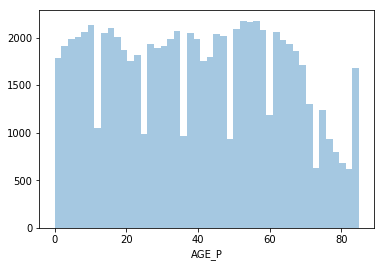

In [30]:
# data.AGE_P.value_counts()
ax = sns.distplot(data.AGE_P,kde = False)